# Store24: Gestión de Retención de empleados

### Descripción de variables


| Nombre de variable       | Descripción                                                                                          |
|--------------------------|------------------------------------------------------------------------------------------------------|
| Ventas                   | Ventas del año fiscal 2000                                                                          |
| Utilidad                 | Utilidad del año fiscal 2000 antes de asignaciones de gastos indirectos corporativos, alquiler y depreciación |
| Antigüedad en el puesto del gerente | Antigüedad promedio en el puesto del gerente durante el año fiscal 2000 donde la tenencia se define como el número de meses de experiencia con Store24 |
| Antigüedad en el puesto del personal | Antigüedad promedio en el puesto del personal durante el año fiscal 2000 donde la tenencia se define como el número de meses de experiencia con Store24 |
| Competencia              | Número de competidores por 10.000 personas dentro de un radio de 1⁄2 milla                           |
| Población                | Población dentro de un radio de 1⁄2 milla                                                            |
| Visibilidad              | Calificación de cinco puntos en la visibilidad de la tienda donde 5 es el puntaje más alto           |
| Volumen de peatones      | Calificación de cinco puntos en el volumen de tráfico de peatones donde 5 es el puntaje más alto    |
| 24 horas                 | Indicador de si la tienda abre o no las 24 horas                                                    |
| Residencial              | Indicador de si está ubicada en área residencial o área industrial                                   |


In [45]:
library(readxl)

# Read the Excel file
path <- '/workspaces/devcontainers-rstudio/explore-data/Store24_TIG.xls'

data <- read_excel(path, sheet = "Store24")
# Visualizando Datos
# data
head(data, 10)

store,Sales,Profit,MTenure,CTenure,Pop,Comp,Visibility,PedCount,Res,Hours24,CrewSkill,MgrSkill,ServQual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1060294,265014,0.00000,24.804930,7535,2.797888,3,3,1,1,3.56,3.150000,86.84327
2,1619874,424007,86.22219,6.636550,8630,4.235555,4,3,1,1,3.20,3.556667,94.73510
3,1099921,222735,23.88854,5.026694,9695,4.494666,3,3,1,1,3.80,4.116667,78.94776
4,1053860,210122,0.00000,5.371663,2797,4.253946,4,2,1,1,2.06,4.100000,100.00000
5,1227841,300480,3.87737,6.866530,20335,1.651364,2,5,0,1,3.65,3.588889,68.42164
6,1703140,469050,149.93590,11.351130,16926,3.184613,3,4,1,0,3.58,4.605556,94.73510
7,1809256,476355,62.53080,7.326488,17754,3.377900,2,5,1,1,3.94,4.100000,81.57837
8,1378482,361115,0.00000,56.772080,20824,2.895114,4,3,1,1,3.98,3.800000,78.94776
9,2113089,474725,108.99350,6.061602,26519,2.637630,2,4,1,1,3.22,3.583333,100.00000


In [35]:
library(dplyr)
library(tidyr)

# Asumiendo que 'data' es tu dataframe
summary_stats <- data %>%
  summarise(across(c(Sales, Profit, MTenure, CTenure, Pop, Comp, Visibility, PedCount, Res, Hours24),
                   list(mean = ~mean(.), sd = ~sd(.), min = ~min(.), max = ~max(.)),
                   .names = "{.col}_{.fn}")) %>%
  pivot_longer(cols = everything(),
               names_to = c("Variable", "Statistic"),
               names_sep = "_",
               values_to = "Value")

# Mostrar los resultados
summary_stats

Variable,Statistic,Value
<chr>,<chr>,<dbl>
Sales,mean,1.205413e+06
Sales,sd,3.045313e+05
Sales,min,6.993060e+05
Sales,max,2.113089e+06
Profit,mean,2.763136e+05
Profit,sd,8.940408e+04
Profit,min,1.221800e+05
Profit,max,5.189980e+05
MTenure,mean,4.529644e+01


### Generando Top 10 Utilidad x Tienda

In [28]:
library(dplyr)

# Asumiendo que 'data' es tu dataframe y contiene las columnas 'Profit', 'MTenure', y 'CTenure'
# Para obtener las 10 tiendas más rentables
top_10_most_profitable <- data %>%
  arrange(desc(Profit)) %>%
  head(10) %>%
  select(store, Sales, Profit, MTenure, CTenure)


# Para calcular la media de 'Profit', 'MTenure', y 'CTenure' de estas 10 tiendas
mean_profit = mean(top_10_most_profitable$Profit)
mean_mtenure = mean(top_10_most_profitable$MTenure)
mean_ctenure = mean(top_10_most_profitable$CTenure)

# Mostrar los resultados
top_10_most_profitable

cat("Media de Profit: ", mean_profit, "\n")
cat("Media de MTenure: ", mean_mtenure, "\n")
cat("Media de CTenure: ", mean_ctenure, "\n")

store,Sales,Profit,MTenure,CTenure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74,1782957,518998,171.09720,29.519510
7,1809256,476355,62.53080,7.326488
9,2113089,474725,108.99350,6.061602
6,1703140,469050,149.93590,11.351130
44,1807740,439781,182.23640,114.151900
2,1619874,424007,86.22219,6.636550
45,1602362,410149,47.64565,9.166325
18,1704826,394039,239.96980,33.774130
11,1583446,389886,44.81977,2.036961


Media de Profit:  438484.3 
Media de MTenure:  110.6299 
Media de CTenure:  22.66611 


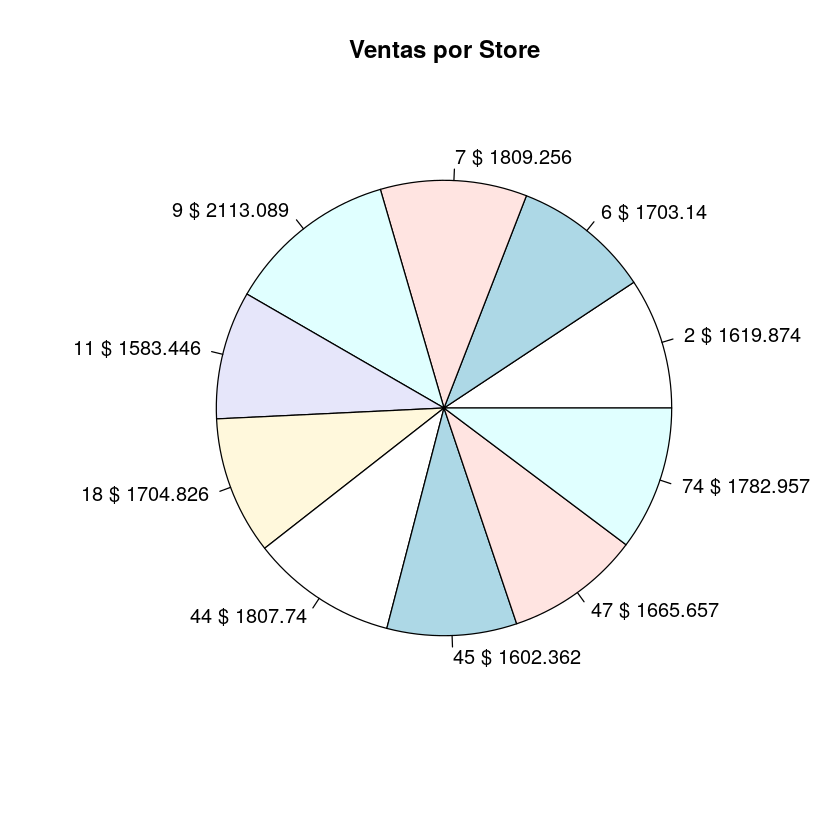

In [50]:
# Gráfico circular de las ventas por store
sales_by_store <- top_10_most_profitable %>%
    group_by(store) %>%
    summarise(total_sales = sum(Sales))

# Convertir el monto a miles
sales_by_store$total_sales <- sales_by_store$total_sales / 1000

pie(sales_by_store$total_sales, labels = paste(sales_by_store$store, "$", sales_by_store$total_sales), main = "Ventas por Store")


### Top 10 Tiendas con Menor Utilidad

In [30]:
library(dplyr)

# Asumiendo que 'data' es tu dataframe y contiene las columnas 'Profit', 'MTenure', y 'CTenure'
# Para obtener las 10 tiendas menos rentables
top_10_least_profitable <- data %>%
  arrange(Profit) %>%
  head(10) %>%
  select(store, Sales, Profit, MTenure, CTenure)

# Para calcular la media de 'Profit', 'MTenure', y 'CTenure' de estas 10 tiendas
mean_profit = mean(top_10_least_profitable$Profit)
mean_mtenure = mean(top_10_least_profitable$MTenure)
mean_ctenure = mean(top_10_least_profitable$CTenure)

# Mostrar los resultados
top_10_least_profitable
cat("Media de Profit: ", mean_profit, "\n")
cat("Media de MTenure: ", mean_mtenure, "\n")
cat("Media de CTenure: ", mean_ctenure, "\n")


store,Sales,Profit,MTenure,CTenure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57,699306,122180,24.3485700,2.956879
66,879581,146058,115.2039000,3.876797
41,744211,147327,14.9180200,11.926080
55,925744,147672,6.6703910,18.365500
32,828918,149033,36.0792600,6.636550
13,857843,152513,0.6571813,1.577002
54,811190,159792,6.6703910,3.876797
52,1073008,169201,24.1185600,3.416838
61,716589,177046,21.8184200,13.305950


Media de Profit:  155858.7 
Media de MTenure:  27.36832 
Media de CTenure:  6.728542 


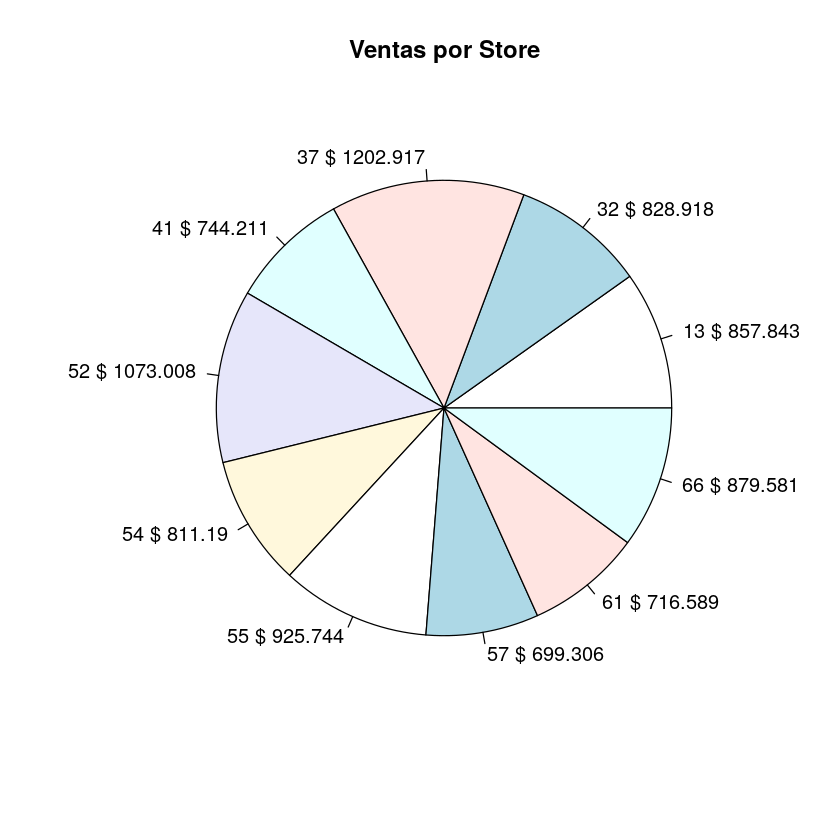

In [51]:
# Gráfico circular de las ventas por store
sales_by_store <- top_10_least_profitable %>%
    group_by(store) %>%
    summarise(total_sales = sum(Sales))

# Convertir el monto a miles
sales_by_store$total_sales <- sales_by_store$total_sales / 1000

pie(sales_by_store$total_sales, labels = paste(sales_by_store$store, "$", sales_by_store$total_sales), main = "Ventas por Store")


#### ¿La antigüedad en el puesto de los gerentes y del personal impacta el desempeño operativo en las tiendas? 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


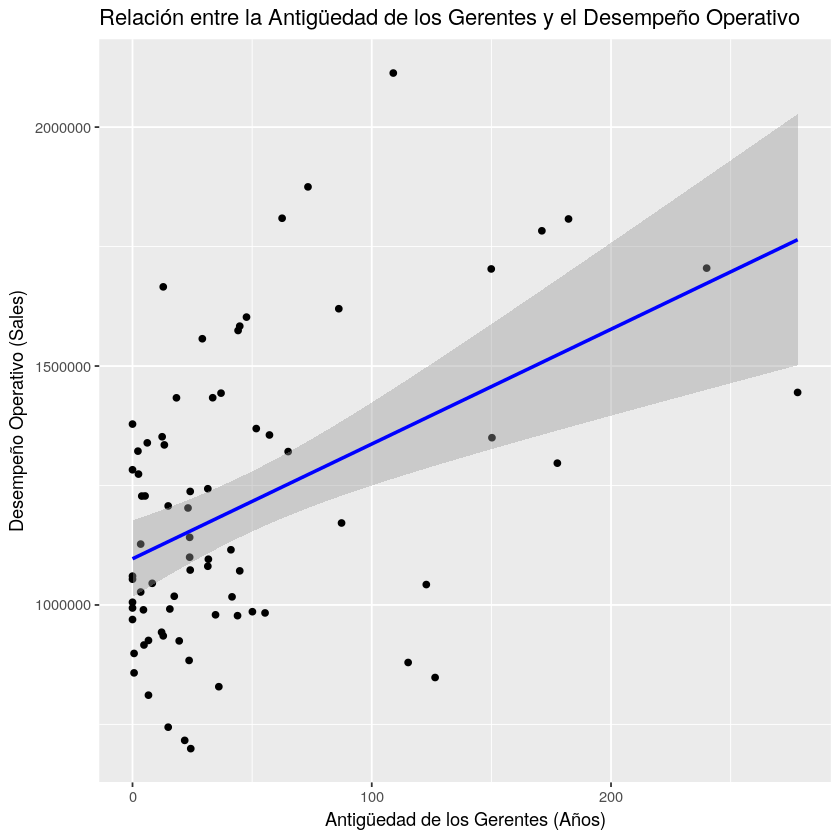

Correlación entre Antigüedad de los Gerentes y Desempeño Operativo (Sales): 0.4548802 
Correlación entre Antigüedad del Personal y Desempeño Operativo (Sales): 0.2543152 


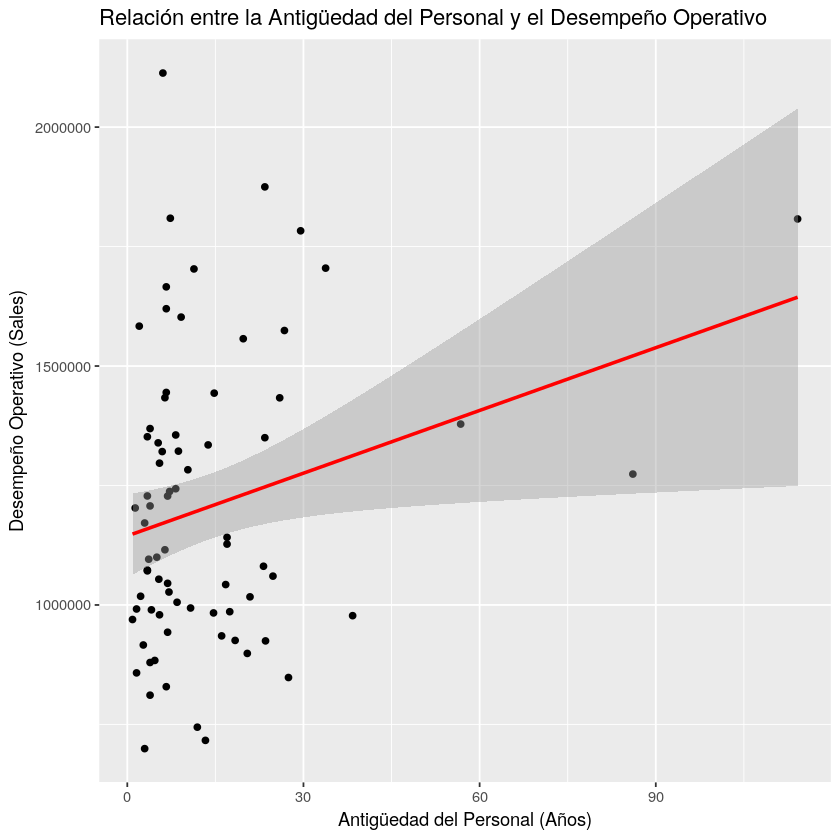

In [36]:
library(ggplot2)

# Gráfico de dispersión para MTenure vs. Sales
ggplot(data, aes(x = MTenure, y = Sales)) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Relación entre la Antigüedad de los Gerentes y el Desempeño Operativo",
       x = "Antigüedad de los Gerentes (Años)",
       y = "Desempeño Operativo (Sales)")

# Gráfico de dispersión para CTenure vs. Sales
ggplot(data, aes(x = CTenure, y = Sales)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Relación entre la Antigüedad del Personal y el Desempeño Operativo",
       x = "Antigüedad del Personal (Años)",
       y = "Desempeño Operativo (Sales)")

# Calcular correlaciones
cor_mtenure_sales <- cor(data$MTenure, data$Sales, use = "complete.obs")
cor_ctenure_sales <- cor(data$CTenure, data$Sales, use = "complete.obs")

# Mostrar correlaciones
cat("Correlación entre Antigüedad de los Gerentes y Desempeño Operativo (Sales):", cor_mtenure_sales, "\n")
cat("Correlación entre Antigüedad del Personal y Desempeño Operativo (Sales):", cor_ctenure_sales, "\n")

### ¿Cómo comparar la importancia de la antigüedad de los empleados vs. la importancia de los factores de ubicación de tiendas respeto al desempeño financiero de las tiendas?

Para comparar la importancia de la antigüedad de los empleados (CTenure y MTenure para el personal y los gerentes, respectivamente) versus la importancia de los factores de ubicación de las tiendas (por ejemplo, Visibility, PedCount para visibilidad y tráfico peatonal) respecto al desempeño financiero de las tiendas (por ejemplo, Sales o Profit), puedes realizar un análisis de correlación y visualizarlo mediante gráficos. Aquí te muestro cómo hacerlo paso a paso en R utilizando ggplot2 para los gráficos y cor para las correlaciones:

1. Calcular las correlaciones entre cada variable (antigüedad de los empleados y factores de ubicación) y el desempeño financiero.
2. Visualizar las correlaciones en un gráfico de barras para comparar su magnitud y dirección.

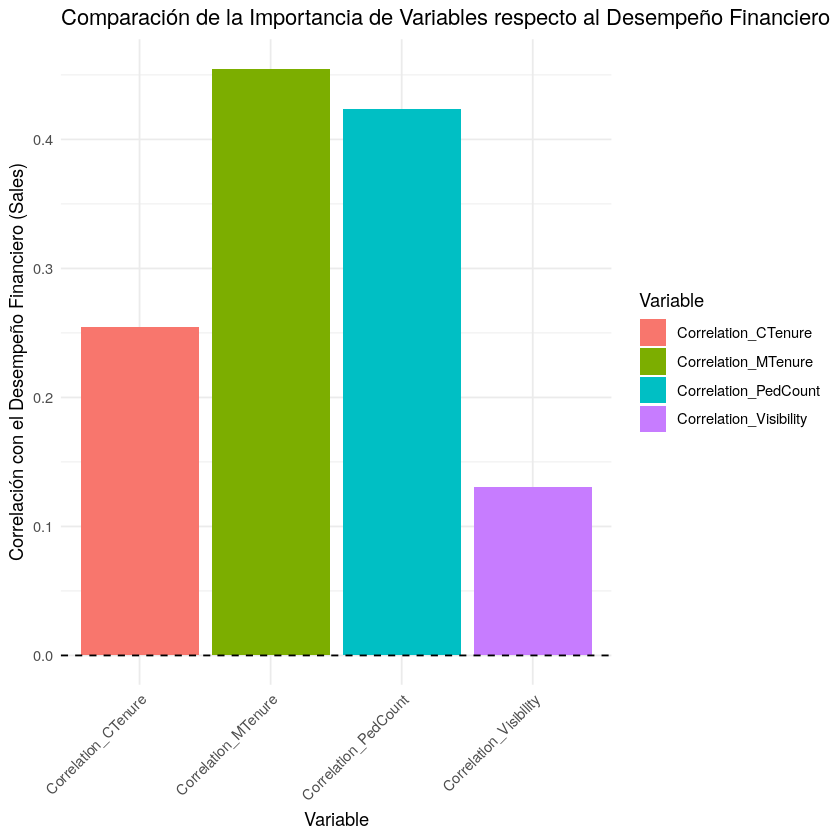

In [37]:
library(ggplot2)
library(dplyr)

# Calcular correlaciones
correlations <- data %>%
  summarise(
    Correlation_MTenure = cor(MTenure, Sales, use = "complete.obs"),
    Correlation_CTenure = cor(CTenure, Sales, use = "complete.obs"),
    Correlation_Visibility = cor(Visibility, Sales, use = "complete.obs"),
    Correlation_PedCount = cor(PedCount, Sales, use = "complete.obs")
  ) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Correlation")

# Gráfico de barras para visualizar las correlaciones
ggplot(correlations, aes(x = Variable, y = Correlation, fill = Variable)) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Comparación de la Importancia de Variables respecto al Desempeño Financiero",
       x = "Variable",
       y = "Correlación con el Desempeño Financiero (Sales)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### ¿La relación entre antigüedad en el puesto y el desempeño operativo cambia con la antigüedad?

Si el objetivo es simplemente explorar la relación entre la antigüedad en el puesto (MTenure) y el desempeño operativo (Sales o Profit) sin segmentar por antigüedad de la tienda, puedes omitir la segmentación y proceder con un análisis más general. Aquí te muestro cómo hacer un gráfico de dispersión con una línea de tendencia para estas dos variables:



`geom_smooth()` using formula = 'y ~ x'


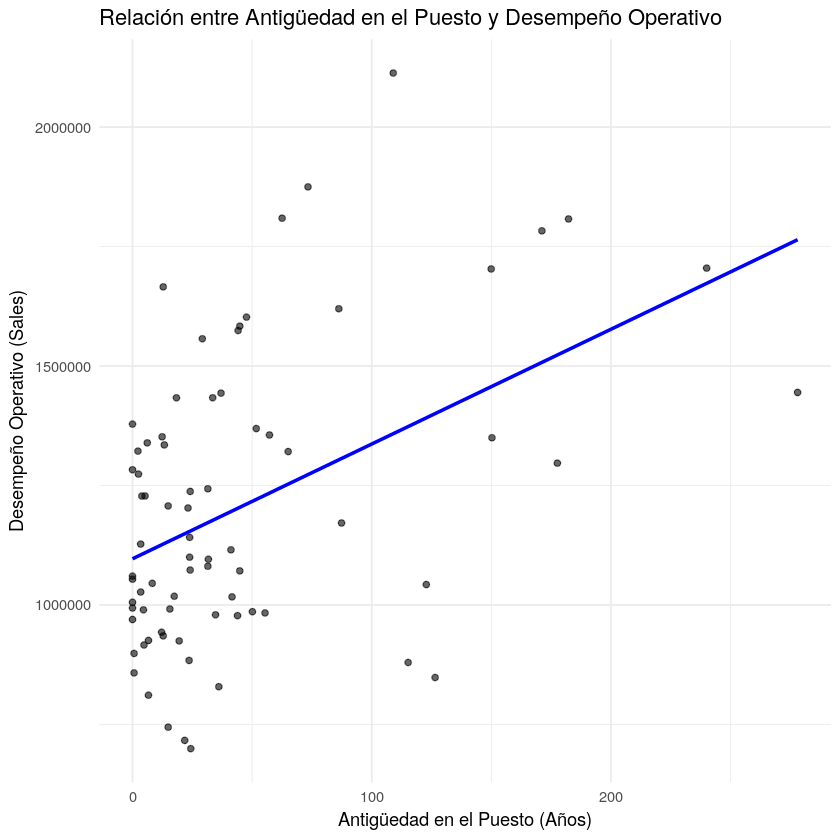

In [39]:
library(ggplot2)


# Gráfico de dispersión con línea de tendencia
ggplot(data, aes(x = MTenure, y = Sales)) +
  geom_point(alpha = 0.6) + # Puntos semi-transparentes para mejor visualización
  geom_smooth(method = "lm", se = FALSE, color = "blue") + # Línea de tendencia
  labs(title = "Relación entre Antigüedad en el Puesto y Desempeño Operativo",
       x = "Antigüedad en el Puesto (Años)",
       y = "Desempeño Operativo (Sales)") +
  theme_minimal()

In [11]:
install.packages("zoo")
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
install.packages("sandwich")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(ggplot2)
library(dplyr)
library(lmtest)
library(sandwich)
library(zoo)

# Análisis exploratorio de datos
summary(data)
ggplot(data, aes(x = antiguedad_gerente, y = desempeno_operativo)) + geom_point() + geom_smooth(method = "lm")
ggplot(data, aes(x = antiguedad_personal, y = desempeno_operativo)) + geom_point() + geom_smooth(method = "lm")

# Modelo de regresión lineal
modelo <- lm(desempeno_operativo ~ antiguedad_gerente + antiguedad_personal, data = data)
summary(modelo)

# Verificar supuestos del modelo
plot(modelo)
bptest(modelo) # Prueba de Breusch-Pagan para heterocedasticidad
coeftest(modelo, vcov = vcovHC(modelo, type = "HC1")) # Coeficientes robustos

# Interpretación de resultados

     store          Sales             Profit          MTenure      
 Min.   : 1.0   Min.   : 699306   Min.   :122180   Min.   :  0.00  
 1st Qu.:19.5   1st Qu.: 984579   1st Qu.:211004   1st Qu.:  6.67  
 Median :38.0   Median :1127332   Median :265014   Median : 24.12  
 Mean   :38.0   Mean   :1205413   Mean   :276314   Mean   : 45.30  
 3rd Qu.:56.5   3rd Qu.:1362388   3rd Qu.:331314   3rd Qu.: 50.92  
 Max.   :75.0   Max.   :2113089   Max.   :518998   Max.   :277.99  
    CTenure              Pop             Comp          Visibility  
 Min.   :  0.8871   Min.   : 1046   Min.   : 1.651   Min.   :2.00  
 1st Qu.:  4.3943   1st Qu.: 5616   1st Qu.: 3.151   1st Qu.:3.00  
 Median :  7.2115   Median : 8896   Median : 3.629   Median :3.00  
 Mean   : 13.9315   Mean   : 9826   Mean   : 3.788   Mean   :3.08  
 3rd Qu.: 17.2156   3rd Qu.:14104   3rd Qu.: 4.230   3rd Qu.:4.00  
 Max.   :114.1519   Max.   :26519   Max.   :11.128   Max.   :5.00  
    PedCount         Res          Hours24       

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'antiguedad_gerente' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = e

ERROR: Error in eval(predvars, data, env): object 'desempeno_operativo' not found
